# Objective

1.	What items customers buy the most and are there any items we should ignore?
2.	What is our strategy to increase sales based on our export destination countries?
3.	Do customer segmentation appropriately. Please explain in detail and completely
4.	Get the hidden insight from the data

# Load Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
df = pd.read_csv('ML_2_Fellow.csv')
df

,Kode_Bayar,Kode_Barang,Barang,Jumlah,Tanggal_Transaksi,Harga_Satuan,Kode_Pelanggan,Negara
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6.0,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6.0,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8.0,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6.0,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6.0,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12.0,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6.0,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4.0,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4.0,12/9/2011 12:50,4.15,12680.0,France


# Data Preprocessing

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Kode_Bayar         541909 non-null  object 
 1   Kode_Barang        535874 non-null  object 
 2   Barang             534420 non-null  object 
 3   Jumlah             535874 non-null  float64
 4   Tanggal_Transaksi  535874 non-null  object 
 5   Harga_Satuan       535874 non-null  float64
 6   Kode_Pelanggan     403182 non-null  float64
 7   Negara             535874 non-null  object 
dtypes: float64(3), object(5)
memory usage: 33.1+ MB


## Check Missing Value

In [4]:
df.isnull().sum()

Kode_Bayar                0
Kode_Barang            6035
Barang                 7489
Jumlah                 6035
Tanggal_Transaksi      6035
Harga_Satuan           6035
Kode_Pelanggan       138727
Negara                 6035
dtype: int64

## Count the percentage of null value to total sample

In [5]:
NullAtJumlah = (df['Jumlah'].isnull().sum()/541909)*100
NullAtKodeBarang = (df['Kode_Barang'].isnull().sum()/541909)*100
NullAtBarang = (df['Barang'].isnull().sum()/541909)*100
NullAtTanggalTransaksi = (df['Tanggal_Transaksi'].isnull().sum()/541909)*100
NullAtHargaSatuan = (df['Harga_Satuan'].isnull().sum()/541909)*100
NullAtKodePelanggan = (df['Kode_Pelanggan'].isnull().sum()/541909)*100
NullAtNegara = (df['Negara'].isnull().sum()/541909)*100

print("Jumlah : ", NullAtJumlah)
print("Kode Barang : ", NullAtKodeBarang)
print("Barang : ", NullAtBarang)
print("Tanggal Transaksi : ", NullAtTanggalTransaksi)
print("Harga Satuan : ", NullAtHargaSatuan)
print("Kode Pelanggan : ", NullAtKodePelanggan)
print("Negara : ", NullAtNegara)

Jumlah :  1.1136556137654108
Kode Barang :  1.1136556137654108
Barang :  1.3819663449029265
Tanggal Transaksi :  1.1136556137654108
Harga Satuan :  1.1136556137654108
Kode Pelanggan :  25.599685556061996
Negara :  1.1136556137654108


## Check Skewness of Column which has null value

**For Jumlah, Harga Satuan, and Kode Pelanggan column**

1. Skew = 0 --> Symmetric Distribution
2. Skew > 0 --> Positive Skewness / Right-skewed --> mean value > median value
3. Skew < 0 --> Negative Skewness / Left-skewed --> mean value < median value

### Skewness in Jumlah

This distribution has skew -0.4888604704870594
This distribution has kurtosis 205255.5137778874


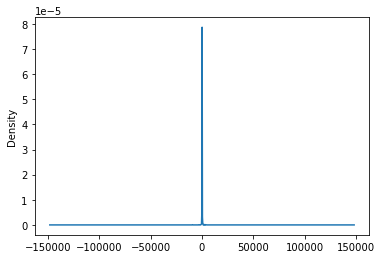

In [6]:
df['Jumlah'].plot(kind = 'density')
print('This distribution has skew', df['Jumlah'].skew())
print('This distribution has kurtosis', df['Jumlah'].kurt())

### Skewness in Harga Satuan

This distribution has skew 185.4701943247801
This distribution has kurtosis 58350.655856254016


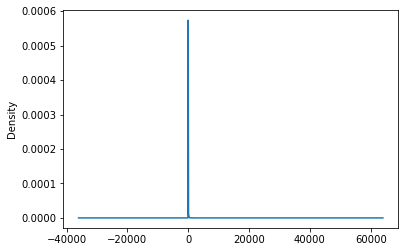

In [7]:
df['Harga_Satuan'].plot(kind = 'density')
print('This distribution has skew', df['Harga_Satuan'].skew())
print('This distribution has kurtosis', df['Harga_Satuan'].kurt())

### Skewness in Kode Pelanggan

This distribution has skew 0.029199833577275926
This distribution has kurtosis -1.1800911943646404


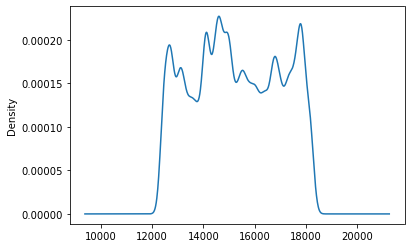

In [8]:
df['Kode_Pelanggan'].plot(kind = 'density')
print('This distribution has skew', df['Kode_Pelanggan'].skew())
print('This distribution has kurtosis', df['Kode_Pelanggan'].kurt())

## Handling Missing Value Numerical Column

I will replace missing value in Jumlah, Harga Satuan, dan Kode Pelanggan column with median value of each column itself

### Get Median Value for Each Column

In [9]:
MedianJumlah = df['Jumlah'].median()
MedianHargaSatuan = df['Harga_Satuan'].median()
MedianKodePelanggan = df['Kode_Pelanggan'].median()

print('Median Jumlah : ',MedianJumlah)
print('Median Harga Satuan : ',MedianHargaSatuan)
print('Median Kode Pelanggan : ',MedianKodePelanggan)

Median Jumlah :  3.0
Median Harga Satuan :  2.08
Median Kode Pelanggan :  15152.0


### Total Data Before Replacing Missing Value

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Kode_Bayar         541909 non-null  object 
 1   Kode_Barang        535874 non-null  object 
 2   Barang             534420 non-null  object 
 3   Jumlah             535874 non-null  float64
 4   Tanggal_Transaksi  535874 non-null  object 
 5   Harga_Satuan       535874 non-null  float64
 6   Kode_Pelanggan     403182 non-null  float64
 7   Negara             535874 non-null  object 
dtypes: float64(3), object(5)
memory usage: 33.1+ MB


### Replace Missing value with Median for each column

In [11]:
df['Jumlah'] = df['Jumlah'].fillna(df['Jumlah'].median())
df['Harga_Satuan'] = df['Harga_Satuan'].fillna(df['Harga_Satuan'].median())
df['Kode_Pelanggan'] = df['Kode_Pelanggan'].fillna(df['Kode_Pelanggan'].median())

### Recount Null Value

In [12]:
df.isnull().sum()

Kode_Bayar              0
Kode_Barang          6035
Barang               7489
Jumlah                  0
Tanggal_Transaksi    6035
Harga_Satuan            0
Kode_Pelanggan          0
Negara               6035
dtype: int64

### Total Data After Replacing Missing Value

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Kode_Bayar         541909 non-null  object 
 1   Kode_Barang        535874 non-null  object 
 2   Barang             534420 non-null  object 
 3   Jumlah             541909 non-null  float64
 4   Tanggal_Transaksi  535874 non-null  object 
 5   Harga_Satuan       541909 non-null  float64
 6   Kode_Pelanggan     541909 non-null  float64
 7   Negara             535874 non-null  object 
dtypes: float64(3), object(5)
memory usage: 33.1+ MB


## Handling Missing Value Categorical Column

I will replace missing value in Kode_Barang, Barang, Tanggal Transaksi, and Negara column with mode value of each column itself

### Get Mode Value of Each column

In [14]:
ModeKodeBarang = df['Kode_Barang'].mode()
ModeBarang = df['Barang'].mode()
ModeTanggalTransaksi = df['Tanggal_Transaksi'].mode()
ModeNegara = df['Negara'].mode()

print('mode Kode Barang : ',ModeKodeBarang)
print('mode Barang : ',ModeBarang)
print('mode Tanggal Transaksi : ',ModeTanggalTransaksi)
print('mode Negara : ',ModeNegara)

mode Kode Barang :  0    85123A
dtype: object
mode Barang :  0    WHITE HANGING HEART T-LIGHT HOLDER
dtype: object
mode Tanggal Transaksi :  0    10/31/2011 14:41
dtype: object
mode Negara :  0    United Kingdom
dtype: object


### Total Data Before Replacing Missing Value

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Kode_Bayar         541909 non-null  object 
 1   Kode_Barang        535874 non-null  object 
 2   Barang             534420 non-null  object 
 3   Jumlah             541909 non-null  float64
 4   Tanggal_Transaksi  535874 non-null  object 
 5   Harga_Satuan       541909 non-null  float64
 6   Kode_Pelanggan     541909 non-null  float64
 7   Negara             535874 non-null  object 
dtypes: float64(3), object(5)
memory usage: 33.1+ MB


### Replace missing value with Mode of Each column

In [16]:
df = df.apply(lambda x: x.fillna(x.value_counts().index[0]))

### Recount Null Value

In [17]:
df.isnull().sum()

Kode_Bayar           0
Kode_Barang          0
Barang               0
Jumlah               0
Tanggal_Transaksi    0
Harga_Satuan         0
Kode_Pelanggan       0
Negara               0
dtype: int64

### Total Data After Replacing Missing Value

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Kode_Bayar         541909 non-null  object 
 1   Kode_Barang        541909 non-null  object 
 2   Barang             541909 non-null  object 
 3   Jumlah             541909 non-null  float64
 4   Tanggal_Transaksi  541909 non-null  object 
 5   Harga_Satuan       541909 non-null  float64
 6   Kode_Pelanggan     541909 non-null  float64
 7   Negara             541909 non-null  object 
dtypes: float64(3), object(5)
memory usage: 33.1+ MB


Until this process, the dataset is already clean and ready to be explored

## Add New Column/Feature to Broaden the Perspective

I decide to add new column/feature named as **Sales** , which mean as total sales income that we've got from transaction of each customer. 

With formula for **Sales** is **Sales = Jumlah X Harga_Satuan**

In [19]:
df['Sales'] = df['Jumlah']*df['Harga_Satuan']
df

,Kode_Bayar,Kode_Barang,Barang,Jumlah,Tanggal_Transaksi,Harga_Satuan,Kode_Pelanggan,Negara,Sales
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6.0,12/1/2010 8:26,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6.0,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8.0,12/1/2010 8:26,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6.0,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6.0,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12.0,12/9/2011 12:50,0.85,12680.0,France,10.20
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6.0,12/9/2011 12:50,2.10,12680.0,France,12.60
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4.0,12/9/2011 12:50,4.15,12680.0,France,16.60
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4.0,12/9/2011 12:50,4.15,12680.0,France,16.60


## Add New Column to Separate Date and Time of Tanggal Transaksi

In [20]:
df['Jam_Transaksi'] = pd.to_datetime(df['Tanggal_Transaksi']).dt.time
df['Tanggal_Transaksi'] = pd.to_datetime(df['Tanggal_Transaksi']).dt.date
df

,Kode_Bayar,Kode_Barang,Barang,Jumlah,Tanggal_Transaksi,Harga_Satuan,Kode_Pelanggan,Negara,Sales,Jam_Transaksi
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6.0,2010-12-01,2.55,17850.0,United Kingdom,15.30,08:26:00
1,536365,71053,WHITE METAL LANTERN,6.0,2010-12-01,3.39,17850.0,United Kingdom,20.34,08:26:00
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8.0,2010-12-01,2.75,17850.0,United Kingdom,22.00,08:26:00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6.0,2010-12-01,3.39,17850.0,United Kingdom,20.34,08:26:00
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6.0,2010-12-01,3.39,17850.0,United Kingdom,20.34,08:26:00
...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12.0,2011-12-09,0.85,12680.0,France,10.20,12:50:00
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6.0,2011-12-09,2.10,12680.0,France,12.60,12:50:00
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4.0,2011-12-09,4.15,12680.0,France,16.60,12:50:00
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4.0,2011-12-09,4.15,12680.0,France,16.60,12:50:00


## Re-order the column

In [21]:
df = df[['Kode_Bayar','Tanggal_Transaksi','Jam_Transaksi','Kode_Barang','Barang','Jumlah','Harga_Satuan','Sales','Kode_Pelanggan','Negara']]
df

,Kode_Bayar,Tanggal_Transaksi,Jam_Transaksi,Kode_Barang,Barang,Jumlah,Harga_Satuan,Sales,Kode_Pelanggan,Negara
0,536365,2010-12-01,08:26:00,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6.0,2.55,15.30,17850.0,United Kingdom
1,536365,2010-12-01,08:26:00,71053,WHITE METAL LANTERN,6.0,3.39,20.34,17850.0,United Kingdom
2,536365,2010-12-01,08:26:00,84406B,CREAM CUPID HEARTS COAT HANGER,8.0,2.75,22.00,17850.0,United Kingdom
3,536365,2010-12-01,08:26:00,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6.0,3.39,20.34,17850.0,United Kingdom
4,536365,2010-12-01,08:26:00,84029E,RED WOOLLY HOTTIE WHITE HEART.,6.0,3.39,20.34,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...,...,...
541904,581587,2011-12-09,12:50:00,22613,PACK OF 20 SPACEBOY NAPKINS,12.0,0.85,10.20,12680.0,France
541905,581587,2011-12-09,12:50:00,22899,CHILDREN'S APRON DOLLY GIRL,6.0,2.10,12.60,12680.0,France
541906,581587,2011-12-09,12:50:00,23254,CHILDRENS CUTLERY DOLLY GIRL,4.0,4.15,16.60,12680.0,France
541907,581587,2011-12-09,12:50:00,23255,CHILDRENS CUTLERY CIRCUS PARADE,4.0,4.15,16.60,12680.0,France


# Objective 1

What items customers buy the most and are there any items we should ignore?

In [22]:
df2 = df.copy()

In [23]:
df2 = df2.groupby(["Negara", "Barang"])
df2 = df2.sum()
df2 = df2.reset_index()
df2

,Negara,Barang,Jumlah,Harga_Satuan,Sales,Kode_Pelanggan
0,Australia,DOLLY GIRL BEAKER,200.0,1.08,216.0,12415.0
1,Australia,I LOVE LONDON MINI BACKPACK,4.0,4.15,16.6,12393.0
2,Australia,10 COLOUR SPACEBOY PEN,48.0,0.85,40.8,12415.0
3,Australia,12 PENCIL SMALL TUBE WOODLAND,384.0,0.55,211.2,12415.0
4,Australia,12 PENCILS TALL TUBE POSY,252.0,1.14,79.8,24849.0
...,...,...,...,...,...,...
19908,Unspecified,WRAP POPPIES DESIGN,25.0,0.42,10.5,16320.0
19909,Unspecified,WRAP SUKI AND FRIENDS,25.0,0.42,10.5,16320.0
19910,Unspecified,WRAP VINTAGE PETALS DESIGN,25.0,0.42,10.5,16320.0
19911,Unspecified,WRAP WEDDING DAY,25.0,0.42,10.5,14265.0


## Find Top Most Buy by Customer

In [24]:
df2.sort_values(by='Jumlah',ascending = False).head(10)

,Negara,Barang,Jumlah,Harga_Satuan,Sales,Kode_Pelanggan
19361,United Kingdom,WORLD WAR 2 GLIDERS ASSTD DESIGNS,48326.0,158.47,12055.96,7545482.0
17293,United Kingdom,JUMBO BAG RED RETROSPOT,43167.0,5015.27,84516.44,30852990.0
19272,United Kingdom,WHITE HANGING HEART T-LIGHT HOLDER,37689.0,19862.57,131611.47,148833056.0
18121,United Kingdom,POPCORN HOLDER,34365.0,822.58,32425.81,12443019.0
15711,United Kingdom,ASSORTED COLOUR BIRD ORNAMENT,33679.0,2442.80,54662.15,21720588.0
17752,United Kingdom,PACK OF 12 LONDON TISSUES,25307.0,230.27,7639.64,8003697.0
17786,United Kingdom,PACK OF 72 RETROSPOT CAKE CASES,24702.0,942.91,15607.49,18331883.0
19106,United Kingdom,VICTORIAN GLASS HANGING T-LIGHT,23242.0,1719.76,31683.17,15779554.0
16047,United Kingdom,BROCADE RING PURSE,22801.0,258.89,5785.47,3742133.0
15719,United Kingdom,ASSORTED COLOURS SILK FAN,20322.0,538.94,16034.24,7552806.0


## Find Least Buy by Customer

In [25]:
df2.sort_values(by='Jumlah',ascending = True).head(50)

,Negara,Barang,Jumlah,Harga_Satuan,Sales,Kode_Pelanggan
19515,United Kingdom,printing smudges/thrown away,-19200.0,0.00,0.00,30304.0
19466,United Kingdom,check,-12030.0,0.00,0.00,2409168.0
18176,United Kingdom,Printing smudges/thrown away,-9058.0,0.00,0.00,15152.0
16572,United Kingdom,Damaged,-7540.0,0.00,0.00,212128.0
19542,United Kingdom,throw away,-5368.0,0.00,0.00,15152.0
19476,United Kingdom,damages,-4338.0,0.00,0.00,681840.0
19497,United Kingdom,incorrect stock entry.,-4320.0,0.00,0.00,30304.0
19543,United Kingdom,thrown away,-4110.0,0.00,0.00,136368.0
19567,United Kingdom,wrongly marked. 23343 in box,-3100.0,0.00,0.00,15152.0
19477,United Kingdom,damages wax,-2844.0,0.00,0.00,30304.0


### Checking all the odd things when Harga_Satuan equal to 0.00

In [26]:
HargaSatuanNol = df2[df2['Harga_Satuan']==0.00]

In [27]:
HargaSatuanNol

,Negara,Barang,Jumlah,Harga_Satuan,Sales,Kode_Pelanggan
8353,Germany,ROUND CAKE TIN VINTAGE GREEN,1.0,0.0,0.0,12647.0
10884,Netherlands,POLKADOT RAIN HAT,144.0,0.0,0.0,14646.0
12700,RSA,Manual,1.0,0.0,0.0,12446.0
15520,United Kingdom,20713,-400.0,0.0,0.0,15152.0
15521,United Kingdom,20713 wrongly marked,-200.0,0.0,0.0,15152.0
...,...,...,...,...,...,...
19566,United Kingdom,wrongly marked carton 22804,-256.0,0.0,0.0,15152.0
19567,United Kingdom,wrongly marked. 23343 in box,-3100.0,0.0,0.0,15152.0
19568,United Kingdom,wrongly sold (22719) barcode,170.0,0.0,0.0,15152.0
19569,United Kingdom,wrongly sold as sets,-600.0,0.0,0.0,15152.0


In [28]:
HargaSatuanNol.head(10)

,Negara,Barang,Jumlah,Harga_Satuan,Sales,Kode_Pelanggan
8353,Germany,ROUND CAKE TIN VINTAGE GREEN,1.0,0.0,0.0,12647.0
10884,Netherlands,POLKADOT RAIN HAT,144.0,0.0,0.0,14646.0
12700,RSA,Manual,1.0,0.0,0.0,12446.0
15520,United Kingdom,20713,-400.0,0.0,0.0,15152.0
15521,United Kingdom,20713 wrongly marked,-200.0,0.0,0.0,15152.0
15599,United Kingdom,?,-1384.0,0.0,0.0,712144.0
15600,United Kingdom,? sold as sets?,-1200.0,0.0,0.0,15152.0
15601,United Kingdom,??,-1849.0,0.0,0.0,106064.0
15602,United Kingdom,?? missing,-170.0,0.0,0.0,15152.0
15603,United Kingdom,???,-390.0,0.0,0.0,15152.0


In [29]:
HargaSatuanNol.head(60)

,Negara,Barang,Jumlah,Harga_Satuan,Sales,Kode_Pelanggan
8353,Germany,ROUND CAKE TIN VINTAGE GREEN,1.0,0.0,0.0,12647.0
10884,Netherlands,POLKADOT RAIN HAT,144.0,0.0,0.0,14646.0
12700,RSA,Manual,1.0,0.0,0.0,12446.0
15520,United Kingdom,20713,-400.0,0.0,0.0,15152.0
15521,United Kingdom,20713 wrongly marked,-200.0,0.0,0.0,15152.0
15599,United Kingdom,?,-1384.0,0.0,0.0,712144.0
15600,United Kingdom,? sold as sets?,-1200.0,0.0,0.0,15152.0
15601,United Kingdom,??,-1849.0,0.0,0.0,106064.0
15602,United Kingdom,?? missing,-170.0,0.0,0.0,15152.0
15603,United Kingdom,???,-390.0,0.0,0.0,15152.0


In [30]:
HargaSatuanNol.tail(60)

,Negara,Barang,Jumlah,Harga_Satuan,Sales,Kode_Pelanggan
19511,United Kingdom,mixed up,-424.0,0.0,0.0,30304.0
19512,United Kingdom,mouldy,-40.0,0.0,0.0,15152.0
19513,United Kingdom,mystery! Only ever imported 1800,-1479.0,0.0,0.0,15152.0
19514,United Kingdom,on cargo order,192.0,0.0,0.0,15152.0
19515,United Kingdom,printing smudges/thrown away,-19200.0,0.0,0.0,30304.0
19516,United Kingdom,rcvd be air temp fix for dotcom sit,100.0,0.0,0.0,15152.0
19517,United Kingdom,re dotcom quick fix.,-100.0,0.0,0.0,15152.0
19518,United Kingdom,re-adjustment,-5.0,0.0,0.0,15152.0
19519,United Kingdom,returned,4.0,0.0,0.0,30304.0
19520,United Kingdom,reverse 21/5/10 adjustment,-200.0,0.0,0.0,30304.0


Until this step, I decide to remove all the odds data when Harga_Satuan equal to zero

### Collect the data when Harga_Satuan is more than 0.00

In [31]:
df2 = df2[df2['Harga_Satuan'] > 0]
df2

,Negara,Barang,Jumlah,Harga_Satuan,Sales,Kode_Pelanggan
0,Australia,DOLLY GIRL BEAKER,200.0,1.08,216.0,12415.0
1,Australia,I LOVE LONDON MINI BACKPACK,4.0,4.15,16.6,12393.0
2,Australia,10 COLOUR SPACEBOY PEN,48.0,0.85,40.8,12415.0
3,Australia,12 PENCIL SMALL TUBE WOODLAND,384.0,0.55,211.2,12415.0
4,Australia,12 PENCILS TALL TUBE POSY,252.0,1.14,79.8,24849.0
...,...,...,...,...,...,...
19908,Unspecified,WRAP POPPIES DESIGN,25.0,0.42,10.5,16320.0
19909,Unspecified,WRAP SUKI AND FRIENDS,25.0,0.42,10.5,16320.0
19910,Unspecified,WRAP VINTAGE PETALS DESIGN,25.0,0.42,10.5,16320.0
19911,Unspecified,WRAP WEDDING DAY,25.0,0.42,10.5,14265.0


### Find Top Least Buy by Customer

In [32]:
df2.sort_values(by='Jumlah').head(10)

,Negara,Barang,Jumlah,Harga_Satuan,Sales,Kode_Pelanggan
16575,United Kingdom,Discount,-1191.0,4914.07,-5028.98,1104897.0
10783,Netherlands,Manual,-480.0,0.22,-105.60,14646.0
18390,United Kingdom,ROTATING SILVER ANGELS T-LIGHT HLDR,-317.0,1554.56,25132.88,7015991.0
18431,United Kingdom,SAMPLES,-59.0,3175.49,-3049.39,954576.0
620,Austria,ANGEL DECORATION STARS ON DRESS,-48.0,0.42,-20.16,12865.0
9475,Israel,SPACEBOY TV DINNER TRAY,-32.0,4.25,-136.00,12666.0
15640,United Kingdom,AMAZON FEE,-30.0,249042.68,-221520.50,515168.0
2817,Czech Republic,PINK METAL CHICKEN HEART,-24.0,4.47,-35.76,38343.0
15738,United Kingdom,ASSORTED TUTTI FRUTTI ROUND BOX,-24.0,1.65,-39.60,15823.0
9305,Israel,ENCHANTED BIRD COATHANGER 5 HOOK,-24.0,3.81,-91.44,12666.0


# Objective 2

What is our strategy to increase sales based on our export destination countries?

## Find Top Least Sales

*Strategy 1 : Reduce the activity in Top 10 Least Sales by Customer*

In [33]:
df2.sort_values(by='Sales').head(10)

,Negara,Barang,Jumlah,Harga_Satuan,Sales,Kode_Pelanggan
15640,United Kingdom,AMAZON FEE,-30.0,249042.680,-221520.500,515168.0
17638,United Kingdom,Manual,3663.0,129871.210,-65139.640,7491183.0
16389,United Kingdom,CRUK Commission,-16.0,7933.430,-7933.430,225536.0
16074,United Kingdom,Bank Charges,-13.0,7505.641,-7175.639,558189.0
16575,United Kingdom,Discount,-1191.0,4914.070,-5028.980,1104897.0
18431,United Kingdom,SAMPLES,-59.0,3175.490,-3049.390,954576.0
13484,Spain,Manual,-3.0,2842.620,-2842.620,37463.0
18133,United Kingdom,POSTAGE,-22.0,19055.800,-1408.570,2163775.0
4178,EIRE,Manual,-2.0,15226.450,-1127.130,179864.0
3623,EIRE,Discount,-1.0,434.510,-434.510,14911.0


## Do Improvement in Top Most Sales

*Strategy 2: Do improvement in selling on Top 10 Most Sales. Such as DOTCOM POSTAGE. So the more things like DOTCOM POSTAGE to be sold, the more sales that we got*

In [34]:
df2.sort_values(by='Sales',ascending = False).head(10)

,Negara,Barang,Jumlah,Harga_Satuan,Sales,Kode_Pelanggan
16547,United Kingdom,DOTCOM POSTAGE,707.0,206252.06,206245.48,10725872.0
18294,United Kingdom,REGENCY CAKESTAND 3 TIER,10376.0,26182.21,134405.94,28438347.0
19272,United Kingdom,WHITE HANGING HEART T-LIGHT HOLDER,37689.0,19862.57,131611.47,148833056.0
17861,United Kingdom,PARTY BUNTING,16709.0,9532.07,92501.73,25246516.0
17293,United Kingdom,JUMBO BAG RED RETROSPOT,43167.0,5015.27,84516.44,30852990.0
17830,United Kingdom,PAPER CHAIN KIT 50'S CHRISTMAS,18197.0,3945.60,61888.19,18136777.0
15711,United Kingdom,ASSORTED COLOUR BIRD ORNAMENT,33679.0,2442.80,54662.15,21720588.0
16230,United Kingdom,CHILLI LIGHTS,10077.0,4519.63,52986.86,10346041.0
17907,United Kingdom,PICNIC BASKET WICKER 60 PIECES,61.0,1299.00,39619.50,30196.0
15877,United Kingdom,BLACK RECORD COVER FRAME,11293.0,1547.92,39387.00,5609589.0


## Reconsidering when using Discount

*Strategy 3 : Reconsidering when using Discount. Because we already use Discount for customer for 1994 times. And the dominant of discount that used are in United Kingdom*

In [35]:
dfDiscount = df2[df2['Barang']=='Discount']
dfDiscount = dfDiscount.groupby(["Barang"])
dfDiscount = dfDiscount.sum()
dfDiscount = dfDiscount.reset_index()
dfDiscount

,Barang,Jumlah,Harga_Satuan,Sales,Kode_Pelanggan
0,Discount,-1194.0,5581.31,-5696.22,1149366.0


In [36]:
df2[df2['Barang']=='Discount']

,Negara,Barang,Jumlah,Harga_Satuan,Sales,Kode_Pelanggan
3623,EIRE,Discount,-1.0,434.51,-434.51,14911.0
9636,Italy,Discount,-1.0,26.33,-26.33,14912.0
10562,Netherlands,Discount,-1.0,206.40,-206.40,14646.0
16575,United Kingdom,Discount,-1191.0,4914.07,-5028.98,1104897.0


# Objective 3

Do customer segmentation appropriately. Please explain in detail and completely

## Customer Segmentation based on All Customer

In [37]:
df2KMeansAll_FullData = df2.groupby(["Kode_Pelanggan"])
df2KMeansAll_FullData = df2KMeansAll_FullData.sum()
df2KMeansAll_FullData = df2KMeansAll_FullData.reset_index()
df2KMeansAll_FullData

,Kode_Pelanggan,Jumlah,Harga_Satuan,Sales
0,12347.0,907.0,125.45,1448.77
1,12348.0,1148.0,8.99,611.48
2,12349.0,381.0,203.09,869.72
3,12350.0,100.0,14.90,159.40
4,12352.0,138.0,50.90,278.50
...,...,...,...,...
7708,22570711.0,14557.0,3172.21,28330.81
7709,25246516.0,16709.0,9532.07,92501.73
7710,28438347.0,10376.0,26182.21,134405.94
7711,30852990.0,43167.0,5015.27,84516.44


### Select Data for Train Clustering

In [38]:
dfKMeansAll = df2KMeansAll_FullData.iloc[:, 1:3]
dfKMeansAll

,Jumlah,Harga_Satuan
0,907.0,125.45
1,1148.0,8.99
2,381.0,203.09
3,100.0,14.90
4,138.0,50.90
...,...,...
7708,14557.0,3172.21
7709,16709.0,9532.07
7710,10376.0,26182.21
7711,43167.0,5015.27


### Scale the Dataset

In [39]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
dfKMeansAll = ss.fit_transform(dfKMeansAll)
dfKMeansAll = pd.DataFrame(dfKMeansAll,columns=['Jumlah','Harga_Satuan'])
dfKMeansAll

,Jumlah,Harga_Satuan
0,0.112526,-0.049285
1,0.233931,-0.078021
2,-0.152451,-0.030128
3,-0.294007,-0.076563
4,-0.274864,-0.067680
...,...,...
7708,6.988820,0.702486
7709,8.072907,2.271748
7710,4.882608,6.380083
7711,21.401331,1.157252


### Elbow Method to Find the Best Cluster

<AxesSubplot:>

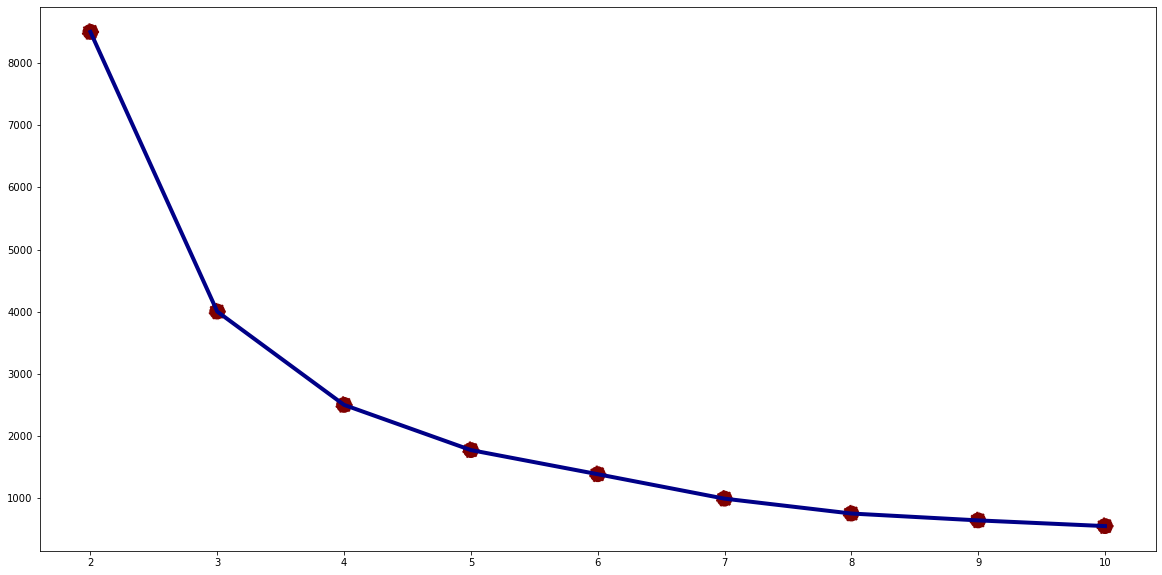

In [40]:
from sklearn.cluster import KMeans
inertia = []

for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(dfKMeansAll.values)
    inertia.append(kmeans.inertia_)



plt.figure(figsize=(20, 10))
# plt.plot(inertia)

sns.lineplot(x=range(2, 11), y=inertia, color='#000087', linewidth = 4)
sns.scatterplot(x=range(2, 11), y=inertia, s=300, color='#800000',  linestyle='--')

From Elbow Method in above, the best total cluster is 4

### KMeans Clustering

In [41]:
kmeans = KMeans(n_clusters=4, random_state=0)
kmeans.fit(dfKMeansAll.values)

KMeans(n_clusters=4, random_state=0)

### Add the cluster label to the df2KMeansAll_FullData

In [43]:
dfKMeansAll['clusters'] = kmeans.labels_
dfKMeansAll

,Jumlah,Harga_Satuan,clusters
0,0.112526,-0.049285,0
1,0.233931,-0.078021,0
2,-0.152451,-0.030128,0
3,-0.294007,-0.076563,0
4,-0.274864,-0.067680,0
...,...,...,...
7708,6.988820,0.702486,2
7709,8.072907,2.271748,2
7710,4.882608,6.380083,3
7711,21.401331,1.157252,2


### Visualize the Clusters

<AxesSubplot:xlabel='Jumlah', ylabel='Harga_Satuan'>

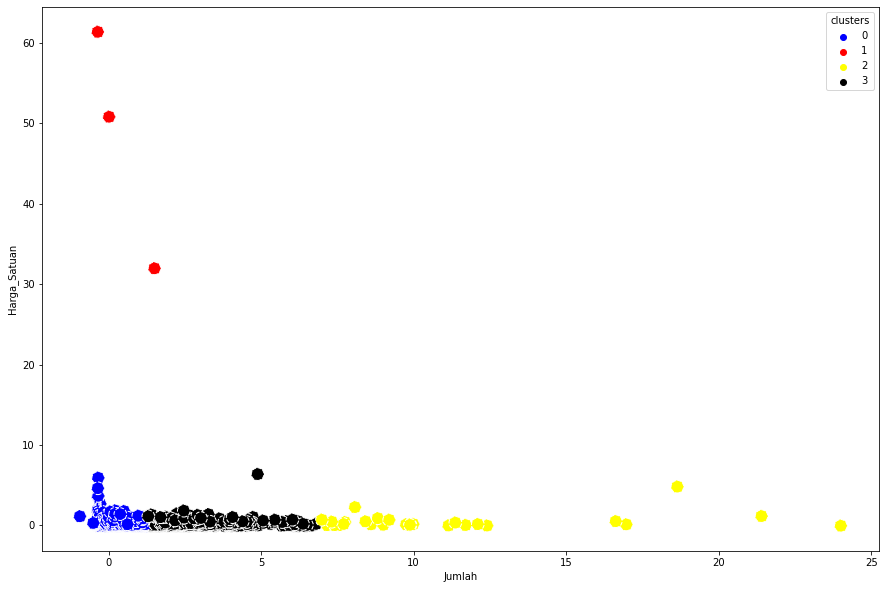

In [44]:
fig, ax = plt.subplots(figsize=(15,10))

sns.scatterplot(
    x="Jumlah", y="Harga_Satuan",
    hue="clusters",
    #edgecolor='green',
    linestyle='--',
    data=dfKMeansAll,
    palette=['blue','red','yellow','black'],
    s=160,
    ax=ax
)

### Evaluation with Silhouette Score

In [45]:
from sklearn.metrics import silhouette_score
for n_clusters in range (2, 11):
    clusterer_All = KMeans(n_clusters=n_clusters)
    preds_All = clusterer_All.fit_predict(dfKMeansAll)
    centers_All = clusterer_All.cluster_centers_

    score_All = silhouette_score(dfKMeansAll, preds_All)
    print("For n_clusters = {}, silhouette score is {})".format(n_clusters, score_All))

For n_clusters = 2, silhouette score is 0.9177783773762074)
For n_clusters = 3, silhouette score is 0.9180031104117062)
For n_clusters = 4, silhouette score is 0.9162460733419621)
For n_clusters = 5, silhouette score is 0.9114696314750237)
For n_clusters = 6, silhouette score is 0.7659378124445637)
For n_clusters = 7, silhouette score is 0.7655329123831749)
For n_clusters = 8, silhouette score is 0.7660789860915046)
For n_clusters = 9, silhouette score is 0.7686223568595988)
For n_clusters = 10, silhouette score is 0.7659742239503425)


In [46]:
dfKMeansAll['clusters'].value_counts()

0    7348
3     335
2      27
1       3
Name: clusters, dtype: int64

Best total clusters based on silhoutte score in above is around 2-4 clusters

# Objective 4

Get the hidden insight from the data

## Insight from Harga_Satuan

1. To get insight about the price that affordable by customer. 
2. How much sales income from AboveAverageHargaSatuan vs BelowAverageHargaSatuan
3. How much Jumlah from AboveAverageHargaSatuan vs BelowAverageHargaSatuan

Statistical Data Summary
Mean :  127.11394861139338
Median :  4.5
1st Quartile :  1.66
3rd Quartile :  17.115000000000002
IQR :  15.455000000000002
Upper Fence :  40.29750000000001
Lower Fence :  -21.522500000000004

Outliers Data Detection
Upper Outliers Data :  [40.35, 40.38000000000001, 40.4400000000001, 40.44999999999998, 40.48999999999997, 40.5, 40.540000000000035, 40.65, 40.650000000000006, 40.7, 40.71999999999999, 40.72000000000001, 40.73, 40.75, 40.77999999999999, 40.78000000000001, 40.8, 40.8, 40.87999999999999, 40.89000000000001, 40.9, 40.900000000000006, 40.900000000000006, 40.900000000000006, 40.99000000000004, 41.05, 41.06999999999998, 41.099999999999994, 41.160000000000025, 41.18000000000001, 41.25, 41.25, 41.370000000000005, 41.45, 41.49999999999999, 41.49999999999999, 41.510000000000026, 41.52, 41.65, 41.650000000000006, 41.650000000000006, 41.659999999999954, 41.66999999999998, 41.75, 41.750000000000014, 41.800000000000004, 41.83, 41.849999999999994, 41.849999999999994

C:\Users\Ghaza\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Ghaza\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Harga Satuan No Outliers')

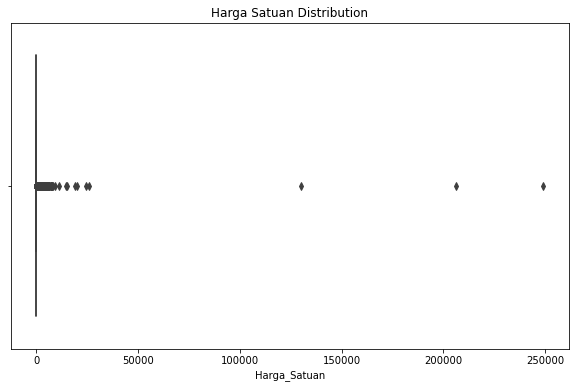

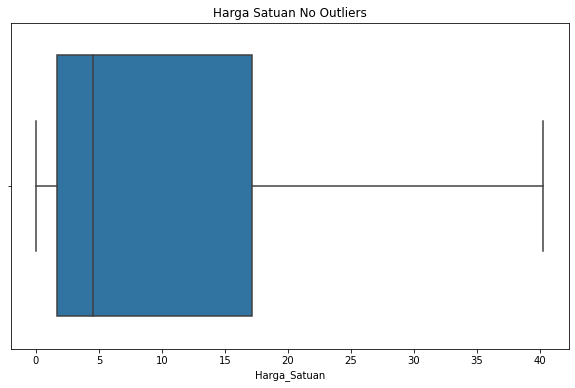

In [47]:
plt.figure(figsize = (10, 6))
sns.boxplot(df2['Harga_Satuan']).set_title('Harga Satuan Distribution')
mean = df2['Harga_Satuan'].mean()
median = df2['Harga_Satuan'].median()
FirstQuartile = df2['Harga_Satuan'].quantile(0.25)
ThirdQuartile = df2['Harga_Satuan'].quantile(0.75)
Interquartile = scipy.stats.iqr(df2['Harga_Satuan'])
UpperFence = ThirdQuartile + (1.5*Interquartile)
LowerFence = FirstQuartile - (1.5*Interquartile)

print ('==================================')
print ('Statistical Data Summary')
print ('==================================')
print ('Mean : ', mean)
print ('Median : ', median)
print ('1st Quartile : ', FirstQuartile)
print ('3rd Quartile : ', ThirdQuartile)
print ('IQR : ', Interquartile)
print ('Upper Fence : ', UpperFence)
print ('Lower Fence : ', LowerFence)
print ('==================================')

UpperOutliers = []
LowerOutliers = []
StatusUpperOutliers = False
StatusLowerOutliers = False
for x in df2['Harga_Satuan']:
  if (x > UpperFence):
    UpperOutliers.append(x)
    StatusUpperOutliers = True
  elif (x < LowerFence):
    LowerOutliers.append(x)
    StatusLowerOutliers = True
print ()
print ('==================================')
print ('Outliers Data Detection')
print ('==================================')
print ('Upper Outliers Data : ', sorted(UpperOutliers, reverse=False))
print ('Upper Outliers Status : ', StatusUpperOutliers)
print ('Lower Outliers Data : ', sorted(LowerOutliers, reverse=False))
print ('Lower Outliers Status : ', StatusLowerOutliers)
print ('==================================')

plt.figure(figsize = (10, 6))
sns.boxplot(df2['Harga_Satuan'], showfliers = False).set_title('Harga Satuan No Outliers')

### Check Data for AboveAverageHargaSatuan or Middle-Up Class Customers

In [48]:
df2[df2['Harga_Satuan']>=127]

,Negara,Barang,Jumlah,Harga_Satuan,Sales,Kode_Pelanggan
369,Australia,POSTAGE,0.0,612.73,87.27,24830.0
804,Austria,POSTAGE,37.0,548.00,1456.00,174219.0
1397,Belgium,POSTAGE,272.0,1503.00,4248.00,1217358.0
1442,Belgium,REGENCY CAKESTAND 3 TIER,47.0,191.25,599.25,187088.0
1819,Canada,POSTAGE,1.0,550.94,550.94,17444.0
...,...,...,...,...,...,...
19447,United Kingdom,ZINC T-LIGHT HOLDER STAR LARGE,1809.0,171.27,1733.59,2405798.0
19449,United Kingdom,ZINC T-LIGHT HOLDER STARS SMALL,4409.0,248.22,3680.95,3986796.0
19450,United Kingdom,ZINC TOP 2 DOOR WOODEN SHELF,8.0,285.03,193.33,209479.0
19451,United Kingdom,ZINC WILLIE WINKIE CANDLE STICK,2287.0,279.01,2212.67,3865731.0


### Check Data for BelowAverageHargaSatuan or Lower Middle Class Customers

In [49]:
df2[df2['Harga_Satuan']<=127]

,Negara,Barang,Jumlah,Harga_Satuan,Sales,Kode_Pelanggan
0,Australia,DOLLY GIRL BEAKER,200.0,1.08,216.0,12415.0
1,Australia,I LOVE LONDON MINI BACKPACK,4.0,4.15,16.6,12393.0
2,Australia,10 COLOUR SPACEBOY PEN,48.0,0.85,40.8,12415.0
3,Australia,12 PENCIL SMALL TUBE WOODLAND,384.0,0.55,211.2,12415.0
4,Australia,12 PENCILS TALL TUBE POSY,252.0,1.14,79.8,24849.0
...,...,...,...,...,...,...
19908,Unspecified,WRAP POPPIES DESIGN,25.0,0.42,10.5,16320.0
19909,Unspecified,WRAP SUKI AND FRIENDS,25.0,0.42,10.5,16320.0
19910,Unspecified,WRAP VINTAGE PETALS DESIGN,25.0,0.42,10.5,16320.0
19911,Unspecified,WRAP WEDDING DAY,25.0,0.42,10.5,14265.0


### Sales Income from BelowAverageHargaSatuan

In [50]:
dfBelowAverageHargaSatuan = df2[df2['Harga_Satuan']<=127].groupby('Barang').sum()
dfBelowAverageHargaSatuan['Sales'].sum()

1915239.143

### Sales Income from AboveAverageHargaSatuan

In [51]:
dfAboveAverageHargaSatuan = df2[df2['Harga_Satuan']>=127].groupby('Barang').sum()
dfAboveAverageHargaSatuan['Sales'].sum()

7814764.871000014

### Total Sales Income

In [52]:
df2['Sales'].sum()

9730004.014000013

### Total Jumlah from BelowAverageHargaSatuan

In [53]:
dfBelowAverageHargaSatuan['Jumlah'].sum()

1720536.0

### Total Jumlah from AboveAverageHargaSatuan

In [54]:
dfAboveAverageHargaSatuan['Jumlah'].sum()

3552281.0

### Total Jumlah Data

In [55]:
df2['Jumlah'].sum()

5272817.0

## Customer Segmentation for BelowAverageHargaSatuan or LowerMiddle Class Customer

In [56]:
dfLowerMiddle = df2[df2['Harga_Satuan']<=127]
dfLowerMiddle

,Negara,Barang,Jumlah,Harga_Satuan,Sales,Kode_Pelanggan
0,Australia,DOLLY GIRL BEAKER,200.0,1.08,216.0,12415.0
1,Australia,I LOVE LONDON MINI BACKPACK,4.0,4.15,16.6,12393.0
2,Australia,10 COLOUR SPACEBOY PEN,48.0,0.85,40.8,12415.0
3,Australia,12 PENCIL SMALL TUBE WOODLAND,384.0,0.55,211.2,12415.0
4,Australia,12 PENCILS TALL TUBE POSY,252.0,1.14,79.8,24849.0
...,...,...,...,...,...,...
19908,Unspecified,WRAP POPPIES DESIGN,25.0,0.42,10.5,16320.0
19909,Unspecified,WRAP SUKI AND FRIENDS,25.0,0.42,10.5,16320.0
19910,Unspecified,WRAP VINTAGE PETALS DESIGN,25.0,0.42,10.5,16320.0
19911,Unspecified,WRAP WEDDING DAY,25.0,0.42,10.5,14265.0


In [57]:
dfLowerMiddle_KMeans = dfLowerMiddle.groupby(["Kode_Pelanggan"])
dfLowerMiddle_KMeans = dfLowerMiddle_KMeans.sum()
dfLowerMiddle_KMeans = dfLowerMiddle_KMeans.reset_index()
dfLowerMiddle_KMeans

,Kode_Pelanggan,Jumlah,Harga_Satuan,Sales
0,12347.0,907.0,125.45,1448.77
1,12348.0,1148.0,8.99,611.48
2,12349.0,381.0,203.09,869.72
3,12350.0,100.0,14.90,159.40
4,12352.0,138.0,50.90,278.50
...,...,...,...,...
5662,3919183.0,3783.0,116.96,1606.08
5663,3992594.0,5066.0,108.99,1628.87
5664,4079615.0,5347.0,123.41,2166.61
5665,4364550.0,4509.0,85.65,946.71


In [58]:
dfLowerMiddle_KMeans_DataTrain = dfLowerMiddle_KMeans.iloc[:, 1:3]
dfLowerMiddle_KMeans_DataTrain

,Jumlah,Harga_Satuan
0,907.0,125.45
1,1148.0,8.99
2,381.0,203.09
3,100.0,14.90
4,138.0,50.90
...,...,...
5662,3783.0,116.96
5663,5066.0,108.99
5664,5347.0,123.41
5665,4509.0,85.65


In [59]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
dfLowerMiddle_KMeans_DataTrain = ss.fit_transform(dfLowerMiddle_KMeans_DataTrain)
dfLowerMiddle_KMeans_DataTrain = pd.DataFrame(dfLowerMiddle_KMeans_DataTrain,columns=['Jumlah','Harga_Satuan'])
dfLowerMiddle_KMeans_DataTrain

,Jumlah,Harga_Satuan
0,0.623563,1.520348
1,0.872618,-0.459185
2,0.079981,2.840036
3,-0.210412,-0.358729
4,-0.171142,0.253182
...,...,...
5662,3.595695,1.376039
5663,4.921580,1.240568
5664,5.211972,1.485673
5665,4.345962,0.843846


<AxesSubplot:>

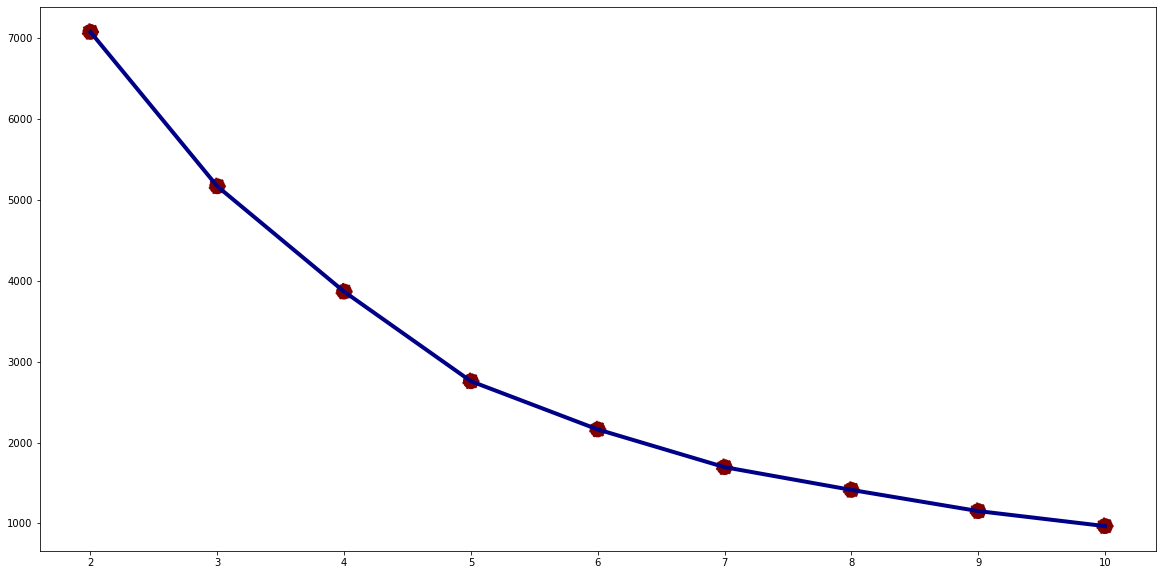

In [60]:
from sklearn.cluster import KMeans
inertiaLowerMiddle = []

for i in range(2, 11):
    kmeansLowerMiddle = KMeans(n_clusters=i, random_state=0)
    kmeansLowerMiddle.fit(dfLowerMiddle_KMeans_DataTrain.values)
    inertiaLowerMiddle.append(kmeansLowerMiddle.inertia_)



plt.figure(figsize=(20, 10))
# plt.plot(inertia)

sns.lineplot(x=range(2, 11), y=inertiaLowerMiddle, color='#000087', linewidth = 4)
sns.scatterplot(x=range(2, 11), y=inertiaLowerMiddle, s=300, color='#800000',  linestyle='--')

Based on Elbow method in above, total best clusters is 5 clusters

In [61]:
kmeansLowerMiddle = KMeans(n_clusters=5, random_state=0)
kmeansLowerMiddle.fit(dfLowerMiddle_KMeans_DataTrain.values)

KMeans(n_clusters=5, random_state=0)

In [62]:
dfLowerMiddle_KMeans_DataTrain['clusters'] = kmeansLowerMiddle.labels_
dfLowerMiddle_KMeans_DataTrain

,Jumlah,Harga_Satuan,clusters
0,0.623563,1.520348,0
1,0.872618,-0.459185,2
2,0.079981,2.840036,0
3,-0.210412,-0.358729,2
4,-0.171142,0.253182,2
...,...,...,...
5662,3.595695,1.376039,4
5663,4.921580,1.240568,4
5664,5.211972,1.485673,4
5665,4.345962,0.843846,4


<AxesSubplot:xlabel='Jumlah', ylabel='Harga_Satuan'>

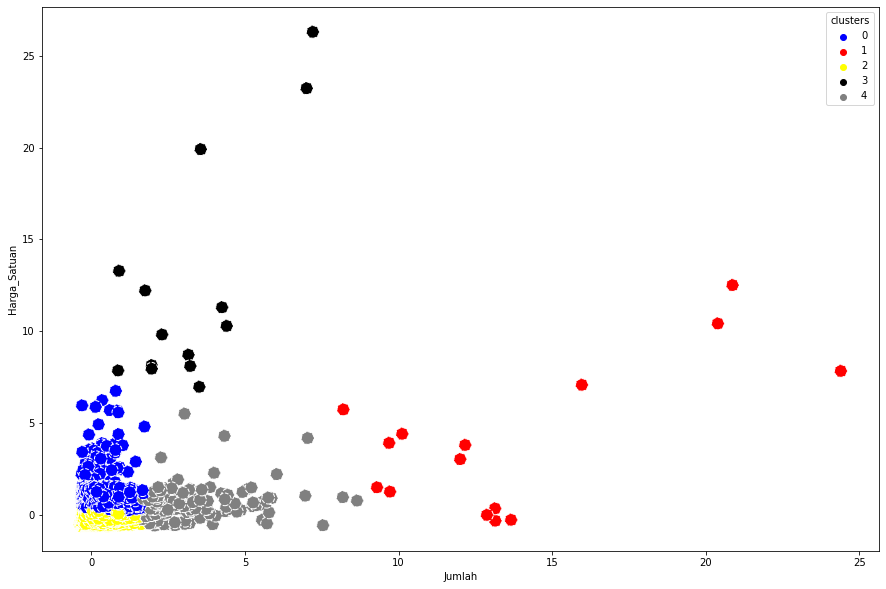

In [63]:
fig, ax = plt.subplots(figsize=(15,10))

sns.scatterplot(
    x="Jumlah", y="Harga_Satuan",
    hue="clusters",
    #edgecolor='green',
    linestyle='--',
    data=dfLowerMiddle_KMeans_DataTrain,
    palette=['blue','red','yellow','black','grey'],
    s=160,
    ax=ax
)

In [64]:
from sklearn.metrics import silhouette_score
for n_clusters in range (2, 11):
    clusterer_LowerMiddle = KMeans(n_clusters=n_clusters)
    preds_LowerMiddle = clusterer_LowerMiddle.fit_predict(dfLowerMiddle_KMeans_DataTrain)
    centers_LowerMiddle = clusterer_LowerMiddle.cluster_centers_

    score_LowerMiddle = silhouette_score(dfLowerMiddle_KMeans_DataTrain, preds_LowerMiddle)
    print("For n_clusters = {}, silhouette score is {})".format(n_clusters, score_LowerMiddle))

For n_clusters = 2, silhouette score is 0.7576763340881197)
For n_clusters = 3, silhouette score is 0.7848310479328503)
For n_clusters = 4, silhouette score is 0.8022498153612007)
For n_clusters = 5, silhouette score is 0.8055980736008702)
For n_clusters = 6, silhouette score is 0.8070266307636488)
For n_clusters = 7, silhouette score is 0.8078367080884179)
For n_clusters = 8, silhouette score is 0.8037592391408742)
For n_clusters = 9, silhouette score is 0.5673502569986272)
For n_clusters = 10, silhouette score is 0.567588318716097)


In [65]:
dfLowerMiddle_KMeans_DataTrain['clusters'].value_counts()

2    4474
0    1028
4     136
1      15
3      14
Name: clusters, dtype: int64

Based on Silhouette score in above, the best total clusters is from 5-8 Clusters

## Customer Segmentation for AboveAverageHargaSatuan or Middle-Up Class Customer

In [66]:
dfUpMiddle = df2[df2['Harga_Satuan']>=127]
dfUpMiddle

,Negara,Barang,Jumlah,Harga_Satuan,Sales,Kode_Pelanggan
369,Australia,POSTAGE,0.0,612.73,87.27,24830.0
804,Austria,POSTAGE,37.0,548.00,1456.00,174219.0
1397,Belgium,POSTAGE,272.0,1503.00,4248.00,1217358.0
1442,Belgium,REGENCY CAKESTAND 3 TIER,47.0,191.25,599.25,187088.0
1819,Canada,POSTAGE,1.0,550.94,550.94,17444.0
...,...,...,...,...,...,...
19447,United Kingdom,ZINC T-LIGHT HOLDER STAR LARGE,1809.0,171.27,1733.59,2405798.0
19449,United Kingdom,ZINC T-LIGHT HOLDER STARS SMALL,4409.0,248.22,3680.95,3986796.0
19450,United Kingdom,ZINC TOP 2 DOOR WOODEN SHELF,8.0,285.03,193.33,209479.0
19451,United Kingdom,ZINC WILLIE WINKIE CANDLE STICK,2287.0,279.01,2212.67,3865731.0


In [67]:
dfUpMiddle_KMeans = dfUpMiddle.groupby(["Kode_Pelanggan"])
dfUpMiddle_KMeans = dfUpMiddle_KMeans.sum()
dfUpMiddle_KMeans = dfUpMiddle_KMeans.reset_index()
dfUpMiddle_KMeans

,Kode_Pelanggan,Jumlah,Harga_Satuan,Sales
0,12428.0,2.0,275.60,551.20
1,14646.0,-1.0,206.40,-206.40
2,14911.0,0.0,599.51,-269.51
3,17444.0,1.0,550.94,550.94
4,24718.0,9.0,917.50,1207.50
...,...,...,...,...
2066,22570711.0,14557.0,3172.21,28330.81
2067,25246516.0,16709.0,9532.07,92501.73
2068,28438347.0,10376.0,26182.21,134405.94
2069,30852990.0,43167.0,5015.27,84516.44


In [68]:
dfUpMiddle_KMeans_DataTrain = dfUpMiddle_KMeans.iloc[:, 1:3]
dfUpMiddle_KMeans_DataTrain

,Jumlah,Harga_Satuan
0,2.0,275.60
1,-1.0,206.40
2,0.0,599.51
3,1.0,550.94
4,9.0,917.50
...,...,...
2066,14557.0,3172.21
2067,16709.0,9532.07
2068,10376.0,26182.21
2069,43167.0,5015.27


In [69]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
dfUpMiddle_KMeans_DataTrain = ss.fit_transform(dfUpMiddle_KMeans_DataTrain)
dfUpMiddle_KMeans_DataTrain = pd.DataFrame(dfUpMiddle_KMeans_DataTrain,columns=['Jumlah','Harga_Satuan'])
dfUpMiddle_KMeans_DataTrain

,Jumlah,Harga_Satuan
0,-0.524758,-0.107776
1,-0.525677,-0.116686
2,-0.525370,-0.066067
3,-0.525064,-0.072321
4,-0.522614,-0.025121
...,...,...
2066,3.933350,0.265209
2067,4.592494,1.084142
2068,2.652735,3.228113
2069,12.696417,0.502532


<AxesSubplot:>

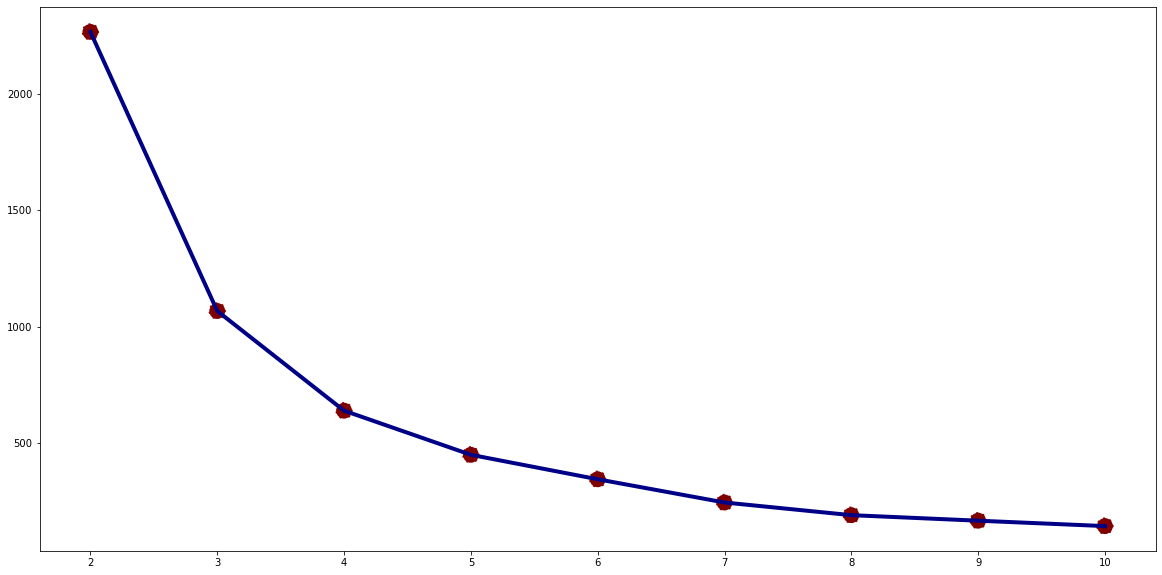

In [70]:
from sklearn.cluster import KMeans
inertiaUpMiddle = []

for i in range(2, 11):
    kmeansUpMiddle = KMeans(n_clusters=i, random_state=0)
    kmeansUpMiddle.fit(dfUpMiddle_KMeans_DataTrain.values)
    inertiaUpMiddle.append(kmeansUpMiddle.inertia_)



plt.figure(figsize=(20, 10))
# plt.plot(inertia)

sns.lineplot(x=range(2, 11), y=inertiaUpMiddle, color='#000087', linewidth = 4)
sns.scatterplot(x=range(2, 11), y=inertiaUpMiddle, s=300, color='#800000',  linestyle='--')

From Elbow Method in above, the best total clusters is 4

In [71]:
kmeansUpMiddle = KMeans(n_clusters=4, random_state=0)
kmeansUpMiddle.fit(dfUpMiddle_KMeans_DataTrain.values)

KMeans(n_clusters=4, random_state=0)

In [72]:
dfUpMiddle_KMeans_DataTrain['clusters'] = kmeansUpMiddle.labels_
dfUpMiddle_KMeans_DataTrain

,Jumlah,Harga_Satuan,clusters
0,-0.524758,-0.107776,0
1,-0.525677,-0.116686,0
2,-0.525370,-0.066067,0
3,-0.525064,-0.072321,0
4,-0.522614,-0.025121,0
...,...,...,...
2066,3.933350,0.265209,3
2067,4.592494,1.084142,2
2068,2.652735,3.228113,3
2069,12.696417,0.502532,2


<AxesSubplot:xlabel='Jumlah', ylabel='Harga_Satuan'>

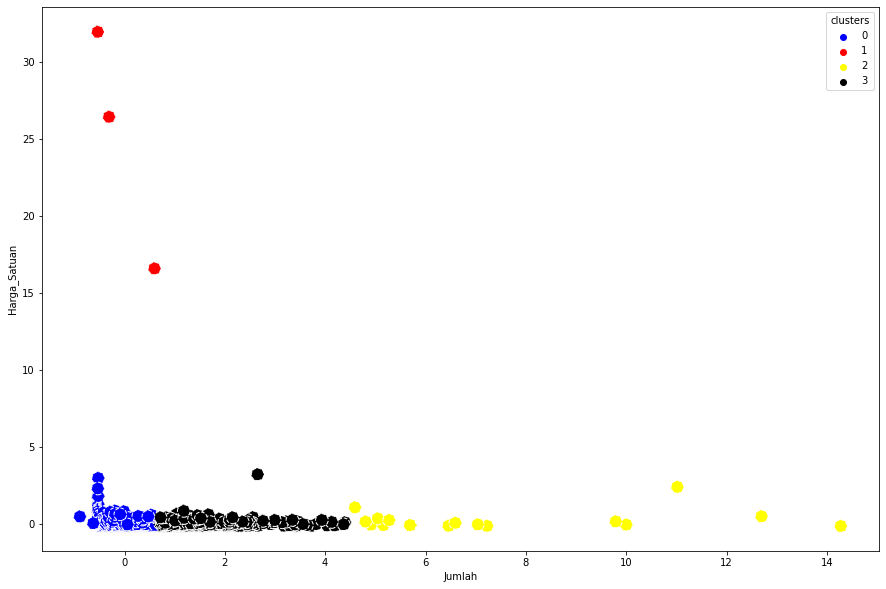

In [73]:
fig, ax = plt.subplots(figsize=(15,10))

sns.scatterplot(
    x="Jumlah", y="Harga_Satuan",
    hue="clusters",
    #edgecolor='green',
    linestyle='--',
    data=dfUpMiddle_KMeans_DataTrain,
    palette=['blue','red','yellow','black'],
    s=160,
    ax=ax
)

In [74]:
from sklearn.metrics import silhouette_score
for n_clusters in range (2, 11):
    clusterer_UpMiddle = KMeans(n_clusters=n_clusters)
    preds_UpMiddle = clusterer_UpMiddle.fit_predict(dfUpMiddle_KMeans_DataTrain)
    centers_UpMiddle = clusterer_UpMiddle.cluster_centers_

    score_UpMiddle = silhouette_score(dfUpMiddle_KMeans_DataTrain, preds_UpMiddle)
    print("For n_clusters = {}, silhouette score is {})".format(n_clusters, score_UpMiddle))

For n_clusters = 2, silhouette score is 0.8741501942100053)
For n_clusters = 3, silhouette score is 0.879110645027752)
For n_clusters = 4, silhouette score is 0.8827751226016805)
For n_clusters = 5, silhouette score is 0.8766304043721709)
For n_clusters = 6, silhouette score is 0.8763687307507714)
For n_clusters = 7, silhouette score is 0.6107952593422028)
For n_clusters = 8, silhouette score is 0.6040628068554914)
For n_clusters = 9, silhouette score is 0.5996271076352566)
For n_clusters = 10, silhouette score is 0.6138662112657115)


Based on Silhouette Score in above, the best total clusters is 4 Clusters

In [75]:
dfUpMiddle_KMeans_DataTrain['clusters'].value_counts()

0    1840
3     211
2      17
1       3
Name: clusters, dtype: int64